# OneModel: an open-source SBML modeling tool focused on accessibility, simplicity and modularity

## Install OneModel and dependencies needed for the workshop

In [ ]:
!pip install -I --no-cache-dir https://github.com/fernandonobel/onemodel/archive/collab.zip

## PART 1: How to model biological processes using OneModel

### Exercise 01: The OneModel REPL (Read-Eval-Print Loop)

OneModel has an interactive command-line REPL (read-eval-print loop).

**Task:** Try to use the OneModel REPL build a model interactively.

**Time limit:** 5 minutes.

For example, 

```
my_variable = 10
parameter a = 0
```

**Supporting material:** Link to the documentation.

**Note:** use only single-line commands. To use a multiline command (i.e. a parameter block) you have to introduce manually intro lines using `;`

For example,

```
# Multi-line version of a parameter block.
parameter
  foo = 10
  bar = 20
end

# Singe-line parameter block.
parameter; foo = 10; bar = 20; end

# Even easier just use regular single-line commands.
parameter foo = 10
parameter bar = 20
```

In [1]:
import onemodel as one

model = one.shell()

print("\n=== Built-in and user-defined variables =============")
print(model)

print("\n=== SBML representation of the model ================")
sbml = model.get_SBML_string()
print(sbml)


OneModel v1.0.0
Documentation: https://onemodel.readthedocs.io/

one> exit()

=== Built-in and user-defined variables =============
Names and values
----------------

locals : <builtin-function>
globals : <builtin-function>
print : <builtin-function>
exit : <builtin-function>
__file__ : '/home/nobel/Sync/projects/python/onemodel/examples'
__exit__ : 1
__name__ : '__main__'


=== SBML representation of the model ================
<?xml version="1.0" encoding="UTF-8"?>
<sbml xmlns="http://www.sbml.org/sbml/level3/version2/core" level="3" version="2">
  <model id="main" name="main" substanceUnits="mole" timeUnits="second" extentUnits="mole">
    <listOfUnitDefinitions>
      <unitDefinition id="per_second">
        <listOfUnits>
          <unit kind="second" exponent="-1" scale="0" multiplier="1"/>
        </listOfUnits>
      </unitDefinition>
    </listOfUnitDefinitions>
    <listOfCompartments>
      <compartment id="default_compartment" spatialDimensions="3" size="1" units="litre" cons

### Exercise 02: Define models using scripts

Instead of using the OneModel REPL, we can define models permanently using scripts.

Names and values
----------------

R1 : <rate-rule eq='der(x) := k - d*x'>
x : <species initial_value=0>
d : <parameter value=0.1>
k : <parameter value=20>
locals : <builtin-function>
globals : <builtin-function>
print : <builtin-function>
exit : <builtin-function>
__file__ : '/home/nobel/Sync/projects/python/onemodel/examples'
__exit__ : False
__name__ : '__main__'



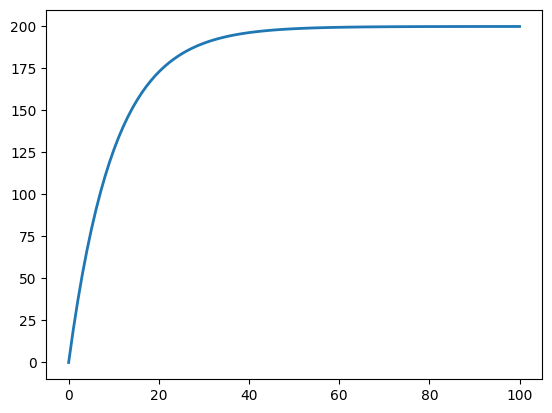

[[<matplotlib.lines.Line2D at 0x7f5274761198>]]

In [7]:
import onemodel as one
import roadrunner

model_code = """
parameter 
    k = 20
    d = 0.1
end

species x = 0

rule R1: der(x) := k - d*x
"""

model = one.evaluate(model_code)

print(model)

sbml = model.get_SBML_string()


rr = roadrunner.RoadRunner(sbml)
results = rr.simulate(0, 100, 100)
rr.plot()

### Exercise 03: Load a script from a file

In [1]:
import onemodel as one

filename = "ex01_simple_gene_expression.one"

model = one.load(filename)

print(model)

Names and values
----------------

_J3 : <reaction eq='protein -> 0 ; d_p*protein'>
_J2 : <reaction eq='mRNA -> mRNA + protein ; k_p*mRNA'>
_J1 : <reaction eq='mRNA -> 0 ; d_m*mRNA'>
_J0 : <reaction eq='0 -> mRNA ; k_m'>
d_p : <parameter value=1>
k_p : <parameter value=1>
d_m : <parameter value=1>
k_m : <parameter value=1>
protein : <species initial_value=0>
mRNA : <species initial_value=0>
locals : <builtin-function>
globals : <builtin-function>
print : <builtin-function>
exit : <builtin-function>
__file__ : '/home/nobel/Sync/projects/python/onemodel/examples/ex01_simple_gene_expression.one'
__exit__ : False
__name__ : '__main__'



### Exercise 4: Model constitutive protein expression

In [2]:
import onemodel as one

model_code = """
### Simple gene expression model. ###

species       # Start declaring species.
  mRNA=0      # mRNA concentration.
  protein=0   # Protein concentration.
end           # End declaring species.

parameter     # Start declaring parameters.
  k_m=1       # mRNA transcription rate.
  d_m=1       # mRNA degradation rate.
  k_p=1       # Protein translation rate.
  d_p=1       # Protein degradation rate.
end           # End delaring parameters.

reaction                                # Start declaring reactions.
  0 -> mRNA              ; k_m          # mRNA transcription.
  mRNA -> 0              ; d_m*mRNA     # mRNA degradation.
  mRNA -> mRNA + protein ; k_p*mRNA     # Protein translation.
  protein -> 0           ; d_p*protein  # Protein degradation.
end                                     # Stop declaring reactions.
"""

model = one.evaluate(model_code)

print(model)

Names and values
----------------

_J3 : <reaction eq='protein -> 0 ; d_p*protein'>
_J2 : <reaction eq='mRNA -> mRNA + protein ; k_p*mRNA'>
_J1 : <reaction eq='mRNA -> 0 ; d_m*mRNA'>
_J0 : <reaction eq='0 -> mRNA ; k_m'>
d_p : <parameter value=1>
k_p : <parameter value=1>
d_m : <parameter value=1>
k_m : <parameter value=1>
protein : <species initial_value=0>
mRNA : <species initial_value=0>
locals : <builtin-function>
globals : <builtin-function>
print : <builtin-function>
exit : <builtin-function>
__file__ : '/home/nobel/Sync/projects/python/onemodel/examples'
__exit__ : False
__name__ : '__main__'



## PART 2: How to reuse and extend your models using OneModel